In [1]:
# Dependencies
from bs4 import BeautifulSoup
from splinter import Browser
import pandas as pd
import matplotlib.pyplot as plt
import time

In [2]:
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'

In [3]:
tables = pd.read_html(url)
tables

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [4]:
type(tables)

list

In [5]:
#We can slice off any of those dataframes that we want using normal indexing.
df = tables[0]
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [6]:
df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [7]:
df['terrestrial_date']= df['terrestrial_date'].astype('datetime64[ns]')

In [8]:
df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [9]:
#6.how many months exist on Mars?
df.groupby(df.terrestrial_date.dt.month)['month'].nunique()
print('There are 68 months')

There are 68 months


In [10]:
#7.How many Martian days(sol) worth of data exist in the scraped dataset?
print(df['sol'].value_counts())
print('There are 1867 Martian Days')

10      1
1337    1
1349    1
1348    1
1347    1
       ..
698     1
697     1
696     1
695     1
1977    1
Name: sol, Length: 1867, dtype: int64
There are 1867 Martian Days


In [11]:
# What are the coldest and the warmest months on Mars (at the location of Curiosity)? 
#Get the answer by averaging the minimum daily temperature of all the months. Plot the results as a bar chart.
#average_temp = df.groupby(["month"])["min_temp"].mean()
#average_temp


By using the daily minimum temperature. you can see in 2014 go back to the same placement in 2016. That shows us its a full revolution around the sun. Mars revolves from 1.5 -2 years.


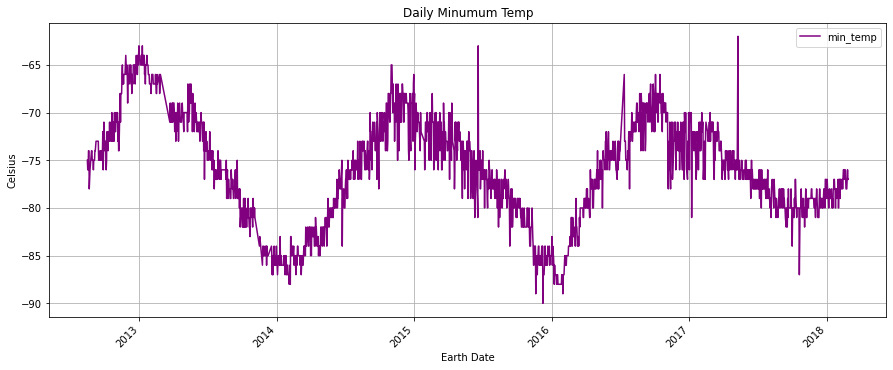

In [12]:
# About how many terrestrial (Earth) days exist in a Martian year?
#That is, in the time that Mars circles the Sun once, how many days elapse on Earth?
#Visually estimate the result by plotting the daily minimum temperature.
revolve_df= df[["terrestrial_date","month","min_temp"]]
graph =revolve_df.plot(kind="line", x="terrestrial_date", y="min_temp", rot=45, grid=True, color= 'purple',
                       figsize=(15,6),                      
                       title= "Daily Minumum Temp")
graph.set_ylabel("Celsius")
graph.set_xlabel("Earth Date")

print('By using the daily minimum temperature. you can see in 2014 go back to the same placement in 2016. That shows us its a full revolution around the sun. Mars revolves from 1.5 -2 years.')

In [13]:
#Export
df.to_csv('Mars_challenge_data.csv')